In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdb
import os

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('Input/inpatientCharges.csv')
df.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71


In [3]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                          163065 non-null object
Provider Id                             163065 non-null int64
Provider Name                           163065 non-null object
Provider Street Address                 163065 non-null object
Provider City                           163065 non-null object
Provider State                          163065 non-null object
Provider Zip Code                       163065 non-null int64
Hospital Referral Region Description    163065 non-null object
 Total Discharges                       163065 non-null int64
 Average Covered Charges                163065 non-null object
 Average Total Payments                 163065 non-null object
Average Medicare Payments               163065 non-null object
dtypes: int64(3), object(9)
memory usage: 14.9+ MB


In [5]:
df['Provider State'].value_counts()

CA    13064
TX    11864
FL    11155
NY     9178
IL     7909
PA     7804
OH     7012
MI     5419
NC     5041
GA     4968
NJ     4826
VA     4332
IN     4260
TN     4168
MO     4059
MA     3842
AL     3635
MD     3330
KY     3229
LA     3027
AZ     2851
SC     2847
WI     2834
WA     2778
OK     2520
MS     2410
MN     2252
AR     2067
CT     2011
CO     1890
IA     1734
KS     1638
WV     1589
OR     1299
NV     1202
NE     1062
NM      917
ME      888
NH      823
UT      732
RI      588
ID      551
MT      506
SD      486
DC      462
HI      442
ND      422
DE      394
VT      270
WY      247
AK      231
Name: Provider State, dtype: int64

In [6]:
df.columns = df.columns.str.strip()
df['Average Covered Charges'] = df['Average Covered Charges'].str.replace('$', '').astype(float)
df['Average Total Payments'] = df['Average Total Payments'].str.replace('$', '').astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].str.replace('$', '').astype(float)
df['Total Cost'] = df[['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']].sum(axis=1)
df['Insurance Covered Ratio'] = (df['Average Covered Charges'] / df['Total Cost'])
df['Cost per Discharge'] = (df['Total Cost'] / df['Total Discharges'])

In [7]:

df = df.sort_values('Provider State')  # Sorting isn't needed
df['NewColumn'] = 'NewColumnValue'
for key in df['Provider State'].unique():  # For each value in Column1
    # These two steps can be combined into a single call
    # I'll separate for clarity:  
    # 1) filter the dataframe on the unique value
    dw = df[df['Provider State']==key]   
    # 2) write the resulting dataframe with header
    dw.to_csv("%s.csv" % key, header=True)  

In [8]:
df_PA = pd.read_csv('PA.csv')
df_PA.groupby(['DRG Definition']).mean()

,Unnamed: 0,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total Cost,Insurance Covered Ratio,Cost per Discharge
DRG Definition,,,,,,,,,,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,830.500000,390136.295455,17813.431818,22.795455,33175.991136,6721.249773,5462.234318,45359.475227,0.693072,2354.944974
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,2052.500000,390131.647059,17620.235294,24.338235,27662.961765,6497.761618,5574.802206,39735.525588,0.655816,1855.317469
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,3592.500000,390131.868421,17467.644737,35.697368,51392.003158,11978.583289,10951.250789,74321.837237,0.632476,3136.958627
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,5710.554545,390123.854545,17552.254545,44.572727,32450.839727,7413.379818,6317.761364,46181.980909,0.654499,1530.163095
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,7629.000000,390127.528736,17661.425287,30.632184,27439.447356,5465.342989,4272.218046,37177.008391,0.698414,1592.393574
069 - TRANSIENT ISCHEMIA,9529.105769,390129.817308,17601.144231,41.932692,23102.803846,4797.797212,3760.878942,31661.480000,0.693042,1061.784767
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC,10754.500000,390129.854167,17918.958333,22.791667,31104.013958,6325.426250,5208.316875,42637.757083,0.695506,2268.657331
101 - SEIZURES W/O MCC,12223.500000,390130.397436,17799.025641,30.294872,25161.902692,5258.844872,4267.668718,34688.416282,0.689020,1456.342149
149 - DYSEQUILIBRIUM,13372.000000,390124.389831,17597.932203,24.372881,21335.959831,4340.404237,3231.810847,28908.174915,0.705917,1454.643085


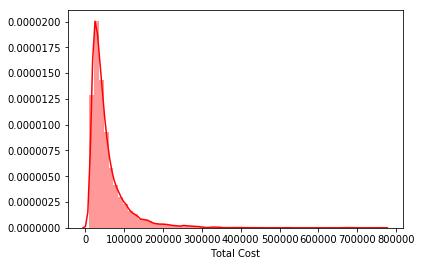

In [9]:
sns.distplot(df_PA['Total Cost'], bins=60, rug=False, color='red')

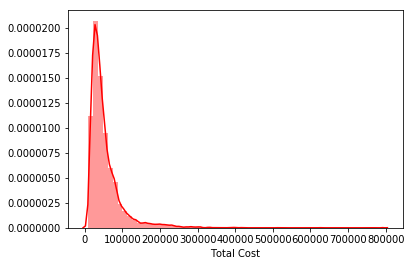

In [10]:
df_NY = pd.read_csv('NY.csv')
sns.distplot(df_NY['Total Cost'], bins=60, rug=False, color='red')

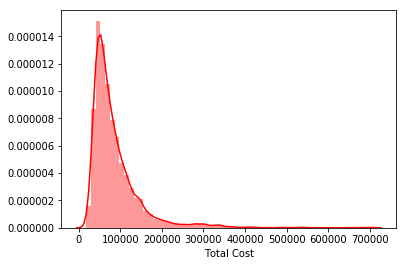

In [11]:
df_NJ = pd.read_csv('NJ.csv')
sns.distplot(df_NJ['Total Cost'], bins=60, rug=False, color='red')

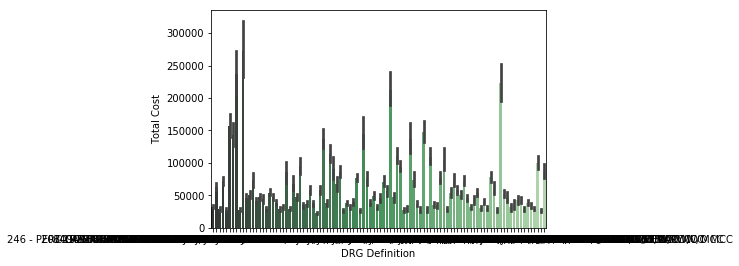

In [12]:
sns.barplot(x="DRG Definition", y="Total Cost", palette="Greens_d", data=df_PA);

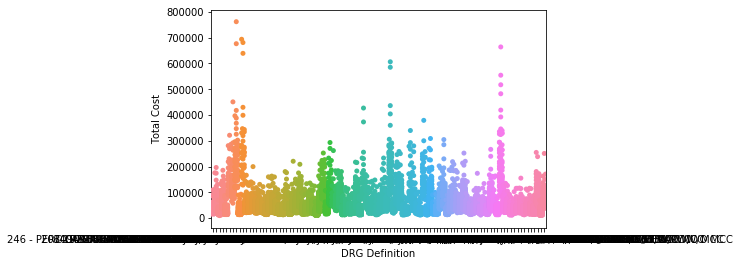

In [13]:
sns.swarmplot(x="DRG Definition", y="Total Cost", data=df_PA)

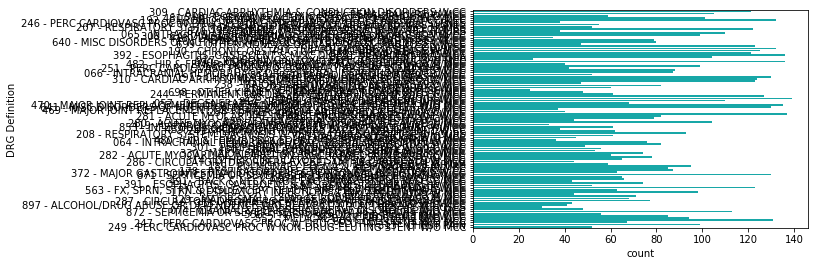

In [14]:
sns.countplot(y="DRG Definition", data=df_PA, color="c");

In [15]:
df_PA['DRG Definition'].unique()


array(['309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W CC',
       '682 - RENAL FAILURE W MCC',
       '918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC',
       '481 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOINT W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS',
       '252 - OTHER VASCULAR PROCEDURES W MCC',
       '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS',
       '195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC',
       '870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '308 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W MCC',
       '418 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. W CC',
       '394 - OTHER DIGESTIVE SYSTEM DIAGNOSES W CC',
       '640 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W MCC',
       '699 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W CC',
   

In [16]:
df_PA['DRG Definition'].nunique() #total 100 unique values for DRG in PA area

100

In [17]:
df_NY['DRG Definition'].nunique() #total 100 unique values for DRG in NY area

100

In [18]:
df_NJ['DRG Definition'].nunique() #total 100 unique values for DRG in NJ area

100

### Now we need to find treatment and its associated costs for different regions like PA, NY and NJ

In [19]:
filenames = ['PA.csv','NY.csv','NJ.csv']
combined_csv = pd.concat( [ pd.read_csv(f) for f in filenames ] , axis=0)

In [20]:
combined_csv.to_csv('out.csv', index=True)

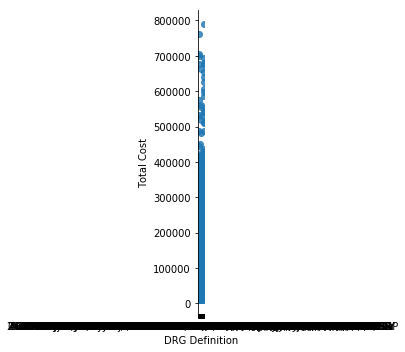

In [21]:
df_combined = pd.read_csv('out.csv')
facet = sns.lmplot(data=df_combined, x='DRG Definition', y='Total Cost', 
                   fit_reg=False, legend=True, legend_out=True)

Text(0.5,1,'Cost per state')

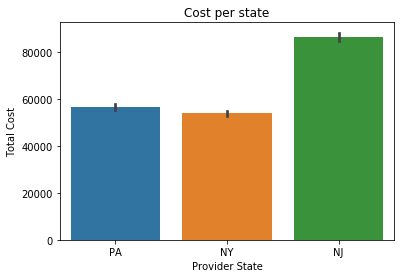

In [22]:
ax = sns.barplot(x = 'Provider State', y= 'Total Cost', data = df_combined)
ax.set(xlabel = 'Provider State', ylabel = 'Total Cost')
ax.set_title('Cost per state')

In [23]:
df_Out_Three=df_combined.groupby(['DRG Definition', 'Provider State']).mean() #calculated average total cost for each kind of treatment across PA NY and NJ
df_Out_Three

Unnamed: 0  \
DRG Definition                                     Provider State                
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC           NJ              4018.354839   
                                                   NY              1025.608696   
                                                   PA              3379.681818   
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O... NJ              3590.981818   
                                                   NY              7876.259615   
                                                   PA              2311.529412   
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR... NJ              2417.090909   
                                                   NY              2992.364583   
                                                   PA              4257.894737   
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR... NJ              1799.677966   
                                                   NY              6106.825000   
                                                   PA               612.218182   
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFAR... NJ              1990.428571   
                                                   NY              8399.934783   
                                                   PA              1983.781609   
069 - TRANSIENT ISCHEMIA                           NJ              3447.852459   
                                                   NY               718.008130   
                                                   PA              7064.653846   
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC NJ              1343.658537   
                                                   NY               177.625000   
                                                   PA              6325.437500   
101 - SEIZURES W/O MCC                             NJ              2369.017241   
                                                   NY               586.176991   
                                                   PA              4957.346154   
149 - DYSEQUILIBRIUM                               NJ              1824.700000   
                                                   NY               917.206186   
                                                   PA              5892.644068   
176 - PULMONARY EMBOLISM W/O MCC                   NJ               665.666667   
                                                   NY               940.131148   
                                                   PA              5309.984615   
...                                                                        ...   
812 - RED BLOOD CELL DISORDERS W/O MCC             NJ              2706.344262   
                                                   NY              1645.315789   
                                                   PA              2424.272727   
853 - INFECTIOUS & PARASITIC DISEASES W O.R. PR... NJ              3057.901961   
                                                   NY              2480.325581   
                                                   PA              3924.229508   
870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS   NJ              2209.666667   
                                                   NY              8184.051282   
                                                   PA               384.973684   
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO... NJ              3584.578125   
                                                   NY              6052.562914   
                                                   PA              5460.100000   
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO... NJ              1043.916667   
                                                   NY              6651.078571   
                                                   PA              7321.159292   
885 - PSYCHOSES                                    NJ              1574.652174   
                                                  

In [24]:
df_Out_Three.to_csv('out_three.csv',index=True)

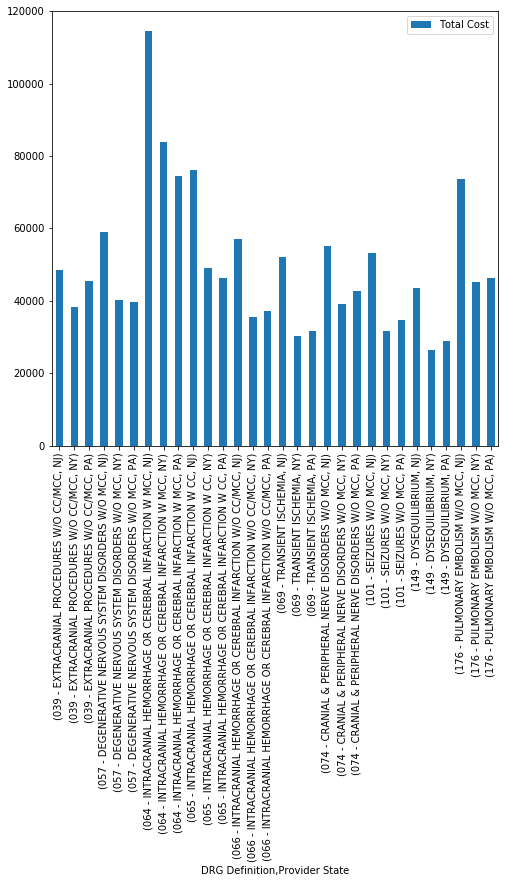

In [25]:
new_df = df_Out_Three.filter(['DRG Definition','Provider State', 'Total Cost'], axis=1)
new_df[:30].plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [ ]:
new_df = df_Out_Three.filter(['DRG Definition','Provider State', 'Total Cost'], axis=1)
new_df[:30].plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)